### 1.
cookie：是保留在客户端上面的一组键值对，cookie不是很安全，别人可以分析存放在本地的cookie

session：是保存在服务器上面的一组键值对，依赖于cookie，安全指数比cookie高

### 2. webscoket

websocket是基于http协议的，可持续化连接

轮询：浏览器每隔几秒就发送一次请求，询问服务器是否有新消息

长轮询：客户端发起连接后，如果没有消息，就一直不返回response给客户端，直到有消息返回，返回完之后，客户端再次发起连接

### 3.  http协议的原理

HTTP协议（HyperText Transfer Protocol，超文本传输协议）是用于从WWW服务器传输超文本到本地浏览器的传送协议

它可以使浏览器更加高效，使网络传输减少。它不仅保证计算机正确快速地传输超文本文档，还确定传输文档中的哪一部分，以及哪部分内容首先显示(如文本先于图形)等。

HTTP是基于TCP协议之上的。

HTTP由请求和响应构成，是一个标准的客户端服务器模型（B/S）。HTTP协议永远都是客户端发起请求，服务器回送响应

- 工作过程

    1. 地址解析    
        需要域名解析系统DNS解析域名，得到IP地址        
    2. 封装HTTP请求数据包
    3. 封装成TCP包，建立TCP连接（TCP三次握手）
    4. 客户端发送请求
    5. 服务器响应
    6. 服务器关闭TCP连接    
        如果浏览器或者服务器在其头信息加入了代码`Connection:keep-alive`，TCP连接在发送后将仍然保持打开状态，于是，浏览器可以继续通过相同的连接发送请求。保持连接节省了为每个请求建立新连接所需的时间，还节约了网络带宽。
        

各层数据流
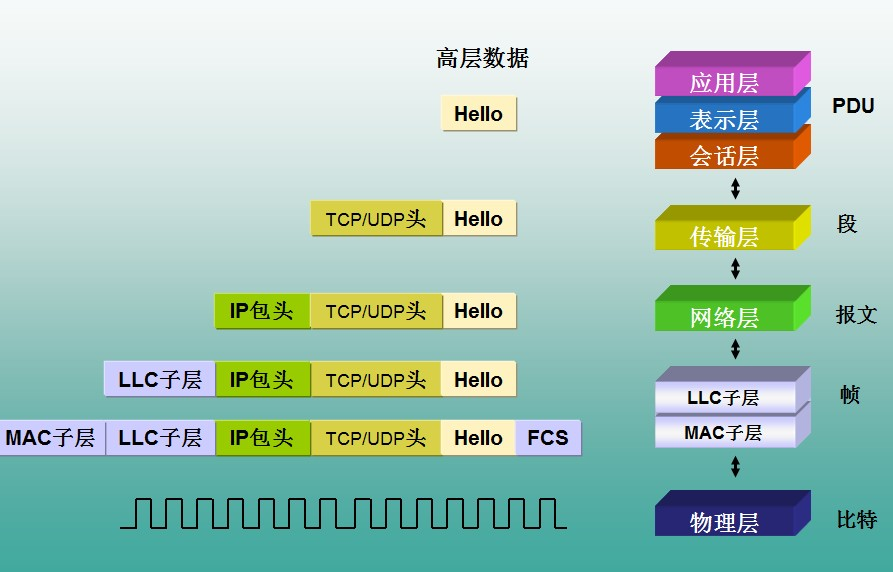

客户机发起一次请求的时候：

   客户机会将请求封装成http数据包-->封装成Tcp数据包-->封装成Ip数据包--->封装成数据帧--->硬件将帧数据转换成bit流（二进制数据）-->最后通过物理硬件（网卡芯片）发送到指定地点。
   
   服务器硬件首先收到bit流....... 然后转换成ip数据包。于是通过ip协议解析Ip数据包，然后又发现里面是tcp数据包，就通过tcp协议解析Tcp数据包，接着发现是http数据包通过http协议再解析http数据包得到数据。

### 4. TCP的三次握手，四次挥手

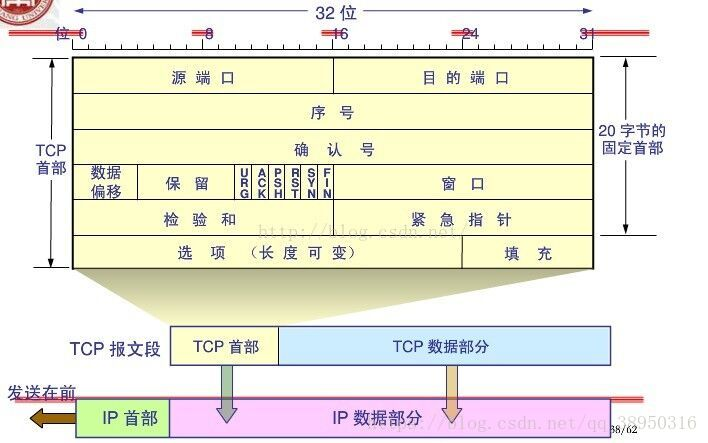

**三次握手过程**
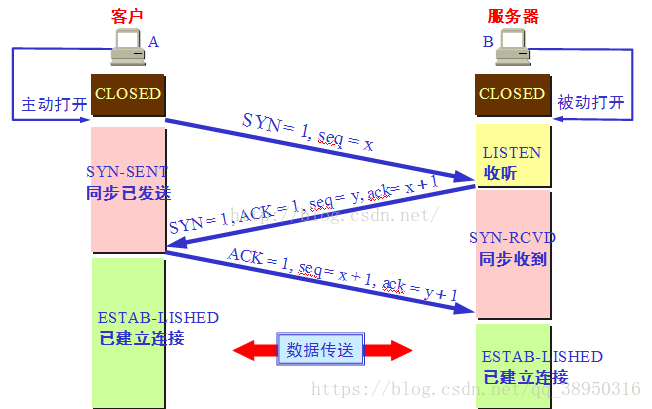

第一次握手：建立连接时，客户端发送syn包（syn=x）到服务器，并进入SYN_SENT状态，等待服务器确认；SYN：同步序列编号（Synchronize Sequence Numbers）。

第二次握手：服务器收到syn包，必须确认客户的SYN（ack=x+1），同时自己也发送一个SYN包（syn=y），即SYN+ACK包，此时服务器进入SYN_RECV状态；

第三次握手：客户端收到服务器的SYN+ACK包，向服务器发送确认包ACK(ack=y+1），此包发送完毕，客户端和服务器进入ESTABLISHED（TCP连接成功）状态，完成三次握手。

**四次挥手过程**
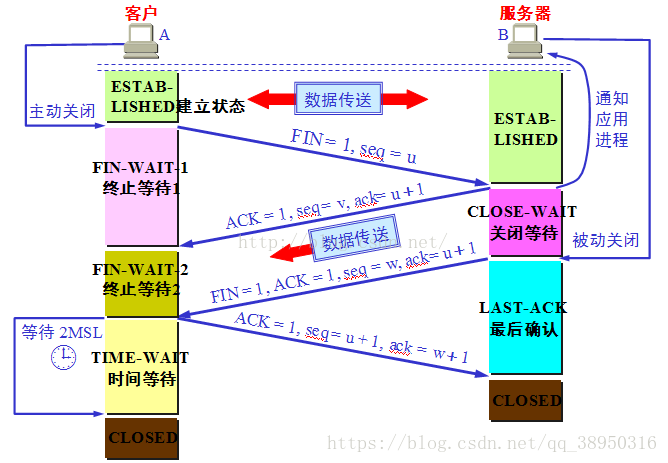

- 客户端进程发出连接释放报文，并且停止发送数据。释放数据报文首部，FIN=1，其序列号为seq=u（等于前面已经传送过来的数据的最后一个字节的序号加1），此时，客户端进入FIN-WAIT-1（终止等待1）状态。 TCP规定，FIN报文段即使不携带数据，也要消耗一个序号。
- 服务器收到连接释放报文，发出确认报文，ACK=1，ack=u+1，并且带上自己的序列号seq=v，此时，服务端就进入了CLOSE-WAIT（关闭等待）状态。TCP服务器通知高层的应用进程，客户端向服务器的方向就释放了，这时候处于半关闭状态，即客户端已经没有数据要发送了，但是服务器若发送数据，客户端依然要接受。这个状态还要持续一段时间，也就是整个CLOSE-WAIT状态持续的时间。
- 客户端收到服务器的确认请求后，此时，客户端就进入FIN-WAIT-2（终止等待2）状态，等待服务器发送连接释放报文（在这之前还需要接受服务器发送的最后的数据）。
- 服务器将最后的数据发送完毕后，就向客户端发送连接释放报文，FIN=1，ack=u+1，由于在半关闭状态，服务器很可能又发送了一些数据，假定此时的序列号为seq=w，此时，服务器就进入了LAST-ACK（最后确认）状态，等待客户端的确认。
- 客户端收到服务器的连接释放报文后，必须发出确认，ACK=1，ack=w+1，而自己的序列号是seq=u+1，此时，客户端就进入了TIME-WAIT（时间等待）状态。注意此时TCP连接还没有释放，必须经过2∗∗MSL（最长报文段寿命）的时间后，当客户端撤销相应的TCB后，才进入CLOSED状态。
- 服务器只要收到了客户端发出的确认，立即进入CLOSED状态。同样，撤销TCB后，就结束了这次的TCP连接。可以看到，服务器结束TCP连接的时间要比客户端早一些。


### 5. HTTPS

在HTTP基础上加入SSL。

SSL：安全套接层，主要用于web的安全传输协议，通过证书认证来确保客户端和网站服务器之间的通信数据是加密安全的。

有两种基本的加解密算法类型：
  - 对称加密（symmetrcic encryption）：密钥只有一个，加密解密为同一个密码，且加解密速度快，典型的对称加密算法有DES、AES，RC5，3DES等；
    对称加密主要问题是共享秘钥，除你的计算机（客户端）知道另外一台计算机（服务器）的私钥秘钥，否则无法对通信流进行加密解密。解决这个问题的方案非对称秘钥。

  - 非对称加密：使用两个秘钥：公共秘钥和私有秘钥。私有秘钥由一方密码保存（一般是服务器保存），另一方任何人都可以获得公共秘钥。
    这种密钥成对出现（且根据公钥无法推知私钥，根据私钥也无法推知公钥），加密解密使用不同密钥（公钥加密需要私钥解密，私钥加密需要公钥解密），相对对称加密速度较慢，典型的非对称加密算法有RSA、DSA等。
    
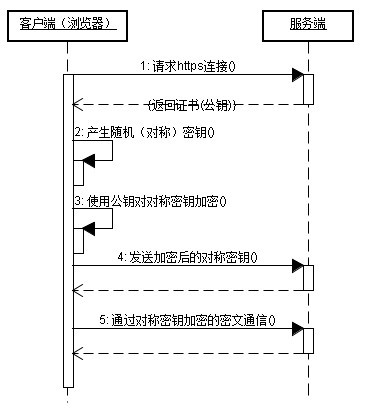


https通信的优点：

1）客户端产生的密钥只有客户端和服务器端能得到；

2）加密的数据只有客户端和服务器端才能得到明文；

3）客户端到服务端的通信是安全的。

### 6.HTTP报文格式

一个HTTP请求报文由请求行（request line）、请求头部（header）、空行和请求数据4个部分组成

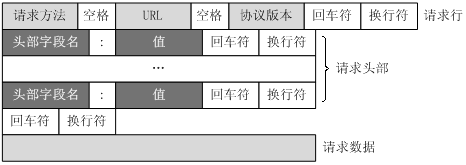

1. 请求头

    请求行由请求方法字段、URL字段和HTTP协议版本字段3个字段组成，它们用空格分隔。例如，GET /index.html HTTP/1.1。

    HTTP协议的请求方法有GET、POST、HEAD、PUT、DELETE、OPTIONS、TRACE、CONNECT。
    
    - GET
    
        使用GET方法时，请求参数和对应的值附加在URL后面，利用一个问号（“?”）代表URL的结尾与请求参数的开始，传递参数长度受限制。
        
        
    - POST
    
        使用POST方法可以允许客户端给服务器提供信息较多。POST方法将请求参数封装在HTTP请求数据中，以名称/值的形式出现，可以传输大量数据，这样POST方式对传送的数据大小没有限制，而且也不会显示在URL中。        
        
    - HEAD
    
        HEAD就像GET，只不过服务端接受到HEAD请求后只返回响应头，而不会发送响应内容。
        

2. 请求头部

    请求头部由键/值对组成，每行一对，用冒号“:”分隔。请求头部通知服务器有关于客户端请求的信息，典型的请求头有：

    User-Agent：产生请求的浏览器类型。
    
    Accept：客户端可识别的内容类型列表。

    Host：请求的主机名，允许多个域名同处一个IP地址，即虚拟主机。
    

3. 空行

    最后一个请求头之后是一个空行，发送回车符和换行符，通知服务器以下不再有请求头。
    

4. 请求数据

    请求数据不在GET方法中使用，而是在POST方法中使用。POST方法适用于需要客户填写表单的场合。与请求数据相关的最常使用的请求头是Content-Type和Content-Length。

### 7. 常见状态代码、状态描述

1xx：指示信息--表示请求已接收，继续处理。

2xx：成功--表示请求已被成功接收、理解、接受。

3xx：重定向--要完成请求必须进行更进一步的操作。

4xx：客户端错误--请求有语法错误或请求无法实现。

5xx：服务器端错误--服务器未能实现合法的请求。


200 OK：客户端请求成功。

400 Bad Request：客户端请求有语法错误，不能被服务器所理解。

401 Unauthorized：请求未经授权，这个状态代码必须和WWW-Authenticate报头域一起使用。

403 Forbidden：服务器收到请求，但是拒绝提供服务。

404 Not Found：请求资源不存在，举个例子：输入了错误的URL。

500 Internal Server Error：服务器发生不可预期的错误。

503 Server Unavailable：服务器当前不能处理客户端的请求，一段时间后可能恢复正常，举个例子：HTTP/1.1 200 OK（CRLF）。

### 8. IP地址分类

- A类地址：1.0.0.0—126.0.0.0
    
    ① 10.X.X.X是私有地址（所谓的私有地址就是在互联网上不使用，而被用在局域网络中的地址）。
    
    范围（10.0.0.0—10.255.255.255）
    
    ② 127.X.X.X是保留地址，用做循环测试。
    

- B类地址：128.0.0.0—191.255.0.0
    
    ① 172.16.0.0—172.31.255.255是私有地址
    
    ② 169.254.X.X是保留地址。如果你的IP地址是自动获取IP地址，而你在网络上又没有找到可用的DHCP服务器。就会得到其中一个IP。
    
    191.255.255.255是广播地址，不能分配。
    

- C类地址：192.0.0.0—223.255.255.0
    
    192.168.X.X是私有地址。（192.168.0.0—192.168.255.255)
    

- D类地址：224.0.0.0—239.255.255.255
    
    多播地址
    

- E类地址：240.0.0.0—255.255.255.254
    
    保留为今后使用

### 9. 以太网的最小帧长

64B

### 10. 各层传输的数据单位
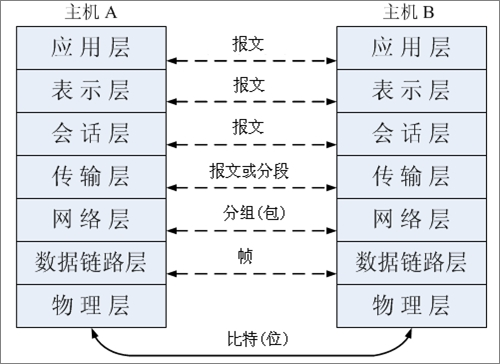

### 11. 有限广播是将广播限制在最小的范围内.该范围是

本网络内

### 12. 四种情况会发送RST包(TCP连接异常终止)：

1. 端口未打开

2. 请求超时

3. 提前关闭

4. 在一个已关闭的socket上收到数据

### 13.FTP端口号20数据端口，21控制端口